# Baseline Model: Naive Forecast
#### using dataset `Combined_Log_Transformed.csv`

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
df = pd.read_csv('../../../../Data/Creation/CSV/Combined_Log_Transformed.csv')

# 'Real Oil Prices' is the target column
oil_prices = df['Real Oil Prices'].values

# Create the naive forecast by shifting the data by 1 time step (1 month)
naive_forecast = oil_prices[:-1]

# Actual values (excluding the first value since we don't have a forecast for it)
actual_values = oil_prices[1:]

# Calculate performance metrics
mae_naive = mean_absolute_error(actual_values, naive_forecast)
mse_naive = mean_squared_error(actual_values, naive_forecast)
rmse_naive = np.sqrt(mse_naive)
mape_naive = np.mean(np.abs((actual_values - naive_forecast) / actual_values)) * 100

print(f"Naive Forecast MAE: {mae_naive}")
print(f"Naive Forecast MSE: {mse_naive}")
print(f"Naive Forecast RMSE: {rmse_naive}")
print(f"Naive Forecast MAPE: {mape_naive}%")

Naive Forecast MAE: 0.06794780039853192
Naive Forecast MSE: 0.009356527648839534
Naive Forecast RMSE: 0.09672914580848697
Naive Forecast MAPE: 2.3625668302013656%


## Naive Forecast
### What is the Naive Forecast?
The Naive Forecast is a basic forecasting method that predicts the next value based on the most recent observed value. It's called "naive" because it doesn't consider any other information or patterns in the data.

### How Does It Work?
For the Naive Forecast:
- The prediction for tomorrow is based on today's value.
- The prediction for the day after tomorrow is based on tomorrow's value.
- And so on...

In code terms:
- We take all values except the last one as our "predictions" for the next day.
- We take all values starting from the second one as the actual next day values.
- We then compare these two sequences to compute the forecast's error.

### Why Use the Naive Forecast?
It's a simple baseline. If a more complex model can't outperform this straightforward method, then that model is not very effective.

### Performance of the Naive Forecast:
- __Mean Absolute Error (MAE)__: 0.06794780039853192
- __Mean Squared Error (MSE)__: 0.009356527648839534
- __Root Mean Squared Error (RMSE)__: 0.09672914580848697
- __Mean Absolute Percentage Error (MAPE)__: 2.3625668302013656%

### Conclusion:
Getting such low MAE, MSE, RMSE and MAPE suggests the naive forecast is performing surprisingly well on this particular dataset and problem.

Some potential reasons we're seeing such excellent naive forecast results:

- The data may have very little noise or variability, making persistence a strong predictor.
- There could be minimal seasonality, trends or patterns for models to improve upon.
- The metric being forecast may inherently be fairly stable and predictable day-to-day.
- There may be additional data cleaning or preprocessing that simplified the problem.
So in time series with very persistent and stable values, even a naive forecast can be highly accurate since the best prediction is often "tomorrow will be the same as today".

#### 1. Actual vs. Predicted for the Naive Forecast:

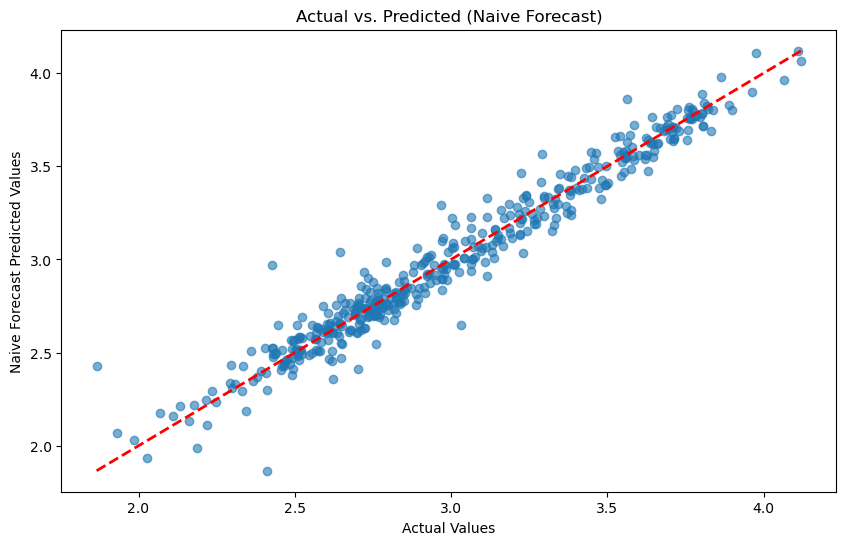

In [8]:
import matplotlib.pyplot as plt

# Actual vs. Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, naive_forecast, alpha=0.6)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Naive Forecast Predicted Values')
plt.title('Actual vs. Predicted (Naive Forecast)')
plt.show()

## Forecasting the Next n (30) Days: Model Evaluation

In [9]:
# Forecast the next 30 days using the naive method
n_periods = 30  # Number of periods to forecast
last_value = oil_prices[-1]  # The last observed value
naive_forecast_next_30 = [last_value] * n_periods  # Repeat the last value for the forecast

# Display the naive forecast
print("Naive forecast for the next 30 days:")
print(naive_forecast_next_30)

Naive forecast for the next 30 days:
[3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876, 3.140725999188876]


## Forecasting the Next 30 Days: Actual vs. Predicted for the Naive Forecast

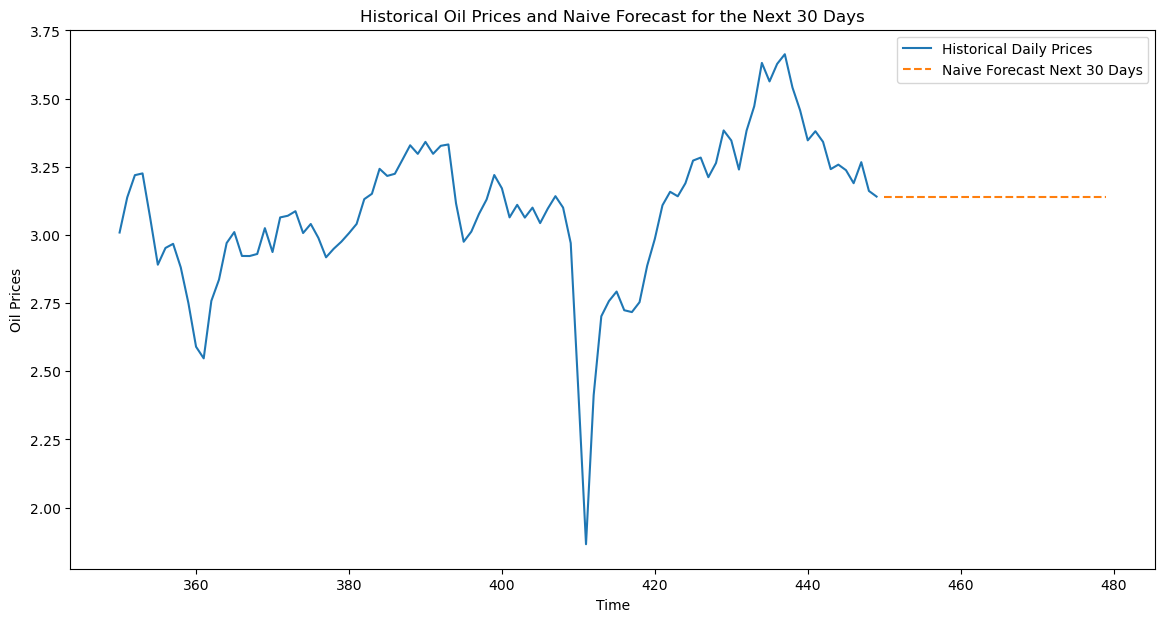

In [10]:
# Plot the historical data
plt.figure(figsize=(14, 7))
plt.plot(df.index[-100:], oil_prices[-100:], label='Historical Daily Prices')  # Plot the last 100 days for context

# Plot the naive forecast
forecast_index = list(range(len(oil_prices), len(oil_prices) + n_periods))  # Create an index for the forecast
plt.plot(forecast_index, naive_forecast_next_30, label='Naive Forecast Next 30 Days', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Oil Prices')
plt.title('Historical Oil Prices and Naive Forecast for the Next 30 Days')
plt.legend()
plt.show()

## Deeper Explanation

The Naive Forecast, also known as the persistence model, is a simple forecasting method that doesn't require any machine learning model or complex calculations. Instead, it's based on a straightforward principle: the prediction for the next time step is the same as the current time step. In other words, it assumes that the future value will be the same as the most recent observed value.

Given this principle:
- For time step t, the prediction for time step t+1 is the value at time step
- For time step t+1, the prediction for time step t+2 is the value at the time step t+1
- And so on...


This is how code creates the naive forecast by simply shifting the data by one time step. There's no need to train a model or make any complex computations. It's "naive" because it doesn't consider any other information except the last observed value.

Here's a breakdown of the code:
- oil_prices[:-1]: This takes all values of oil_prices except the last one. These are the "predictions" for the next time step.
- oil_prices[1:]: This takes all values of oil_prices starting from the second value. These are the actual next time step values that you compare against the naive forecast.
By comparing these two sequences, you can compute the error of the naive forecast. __The simplicity of this method is what makes it a good baseline: if a more complex model can't outperform this simple method, then that model is not be very effective.__